In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import math

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, MaxPooling2D, Conv2D, Dropout, Flatten

# utits

In [4]:
def show_(data):
  image, label = data
  batch = image.shape[0]
  row = col = math.ceil(batch ** 0.5)
  for image_no in range(row * col):
    if batch < image_no +1:
      plt.tight_layout()
      plt.show()
      break

    plt.subplot(row, col, image_no +1)
    plt.imshow(image[image_no], cmap = 'gray')
    plt.title(f'label : \'{np.argmax(label[image_no])}\'')
    plt.xticks([])
    plt.yticks([])

# Function to normalize the images
def preprocess(example):
    image = tf.cast(example['image'], tf.float32) / 255.0
    label = tf.one_hot(example['label'], depth=10)  # 10 classes for MNIST
    return image, label

# loading datasets

In [ ]:
train_ds = tfds.load('mnist', split='train', shuffle_files=True)
valid_ds = tfds.load('mnist', split='test', shuffle_files=True)

# Apply normalization, shuffling, batching, and prefetching
train_ds = train_ds.map(preprocess).shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
valid_ds = valid_ds.map(preprocess).shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)

# ploting 

## plot some train datasets

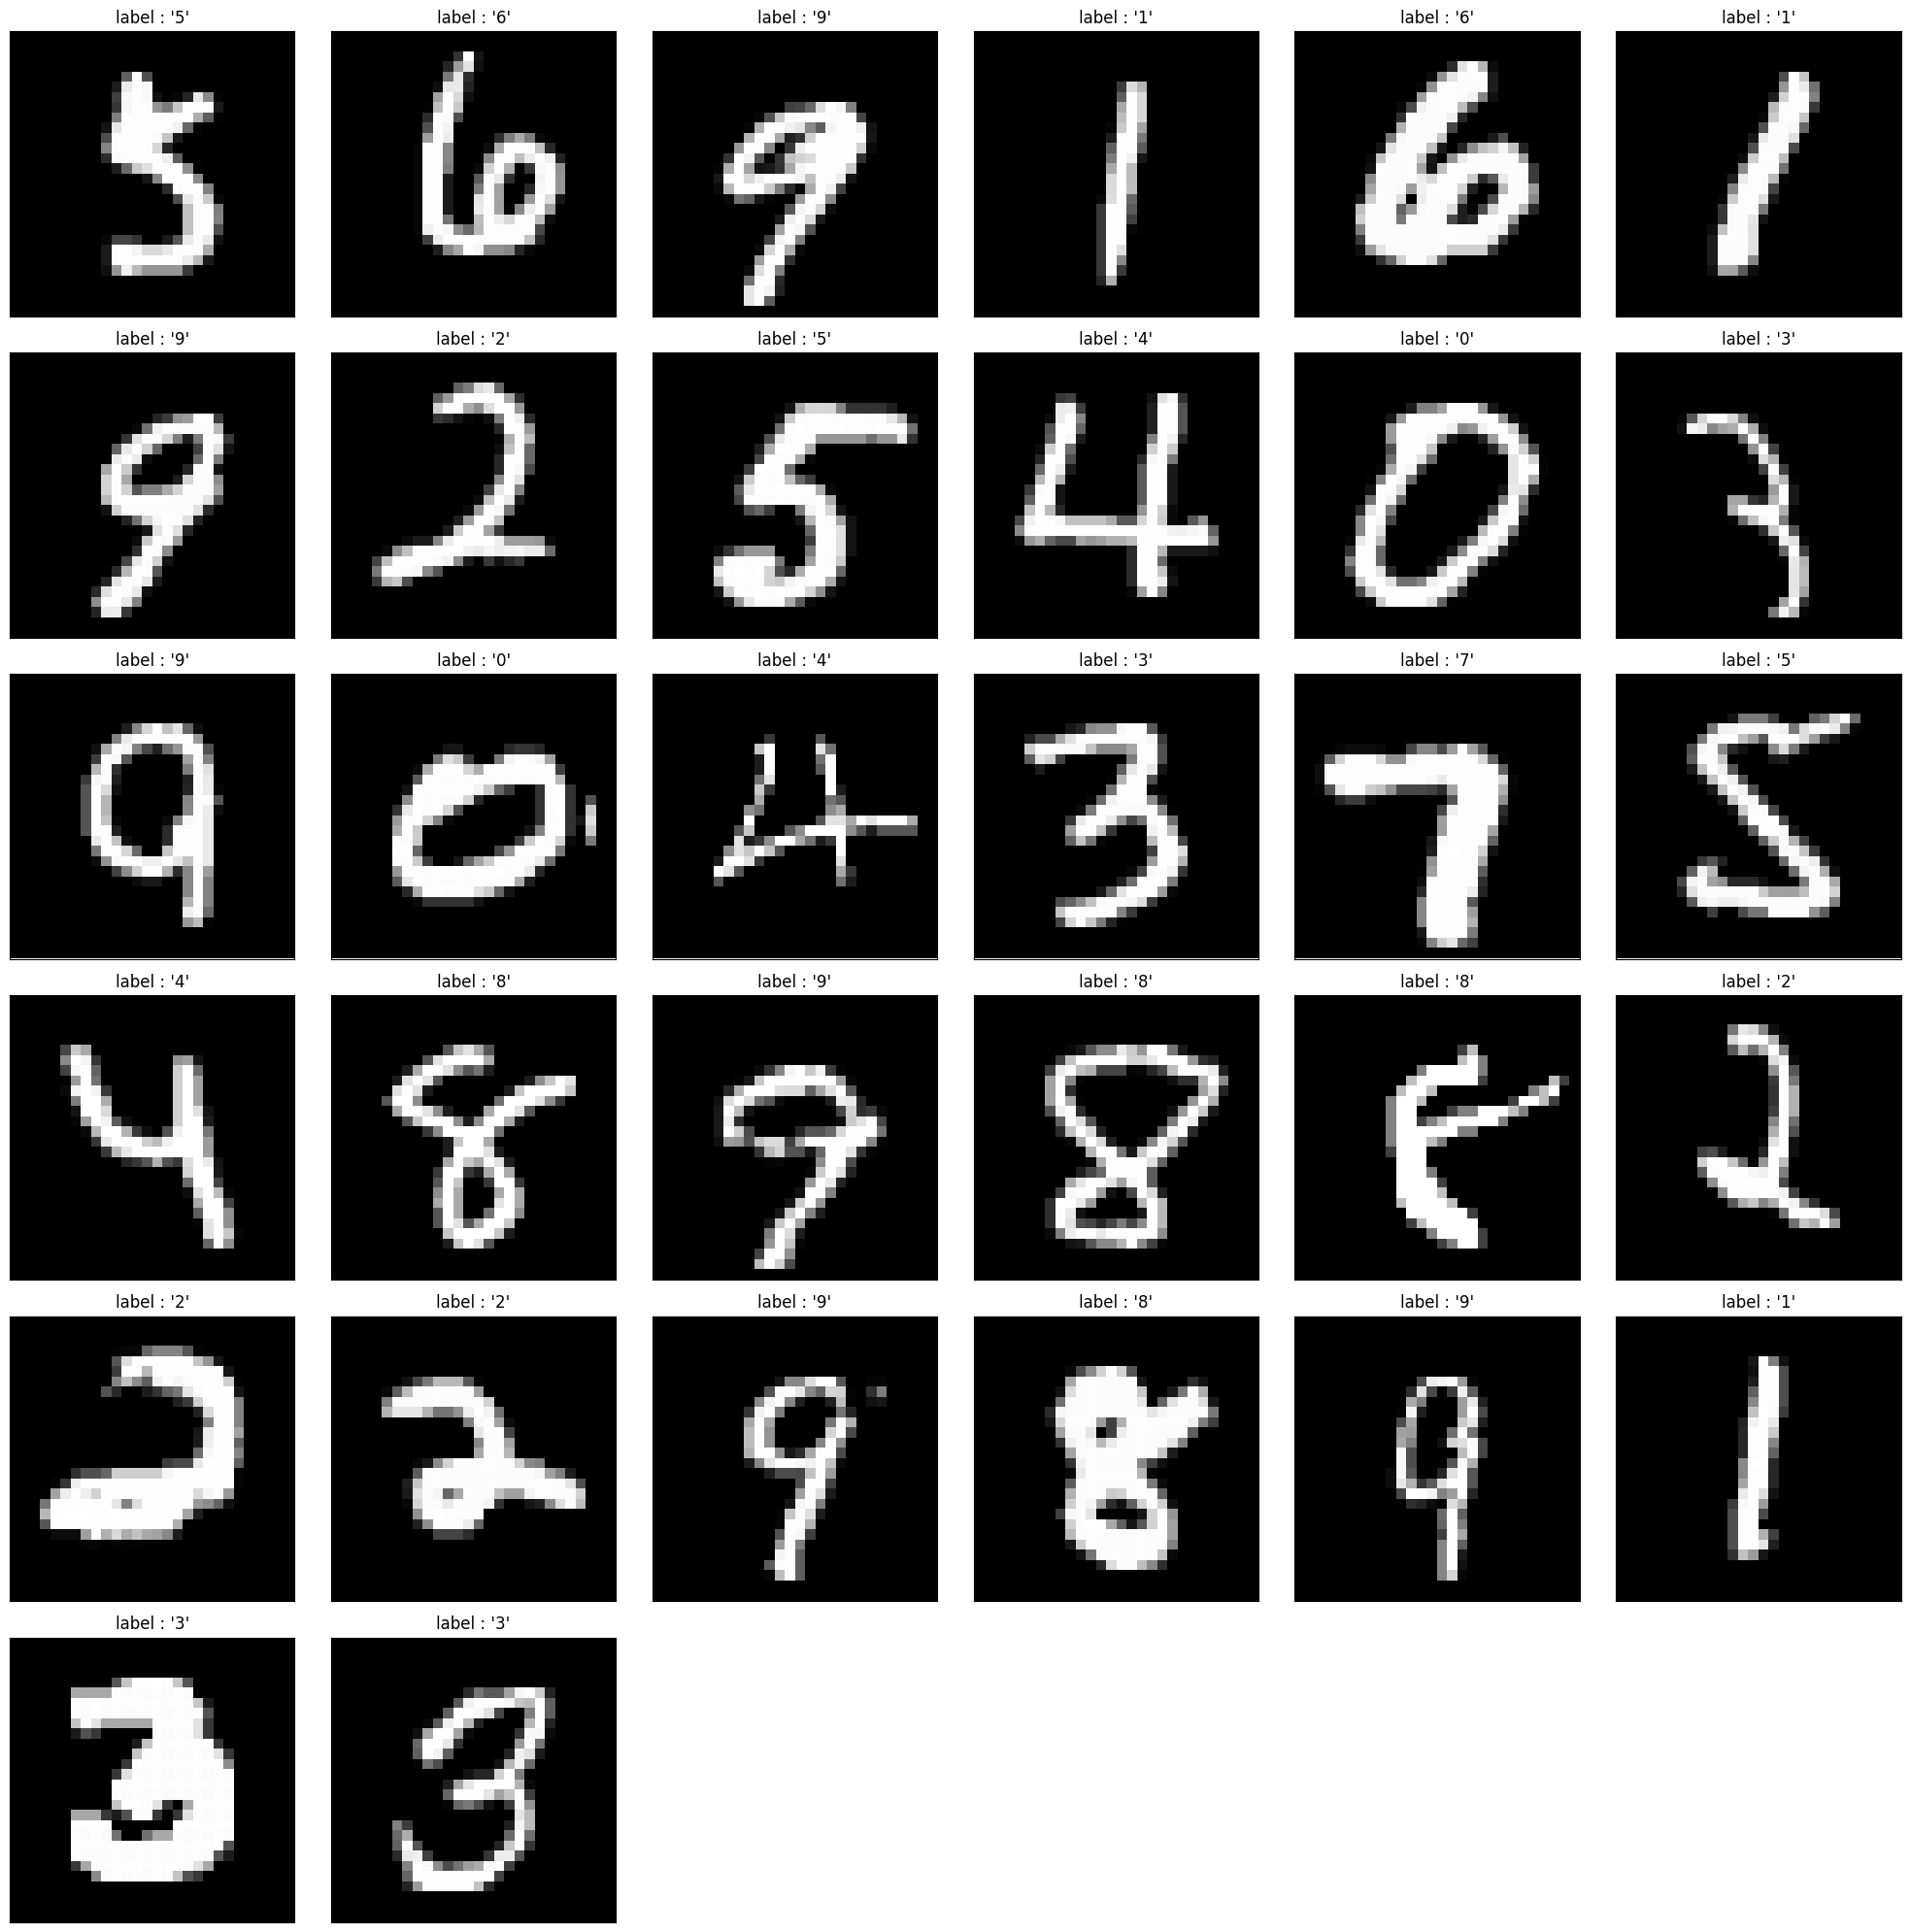

In [6]:
for data in train_ds.take(1):
  plt.figure(figsize = (20,20))
  show_(data)

## plot some validation datasets

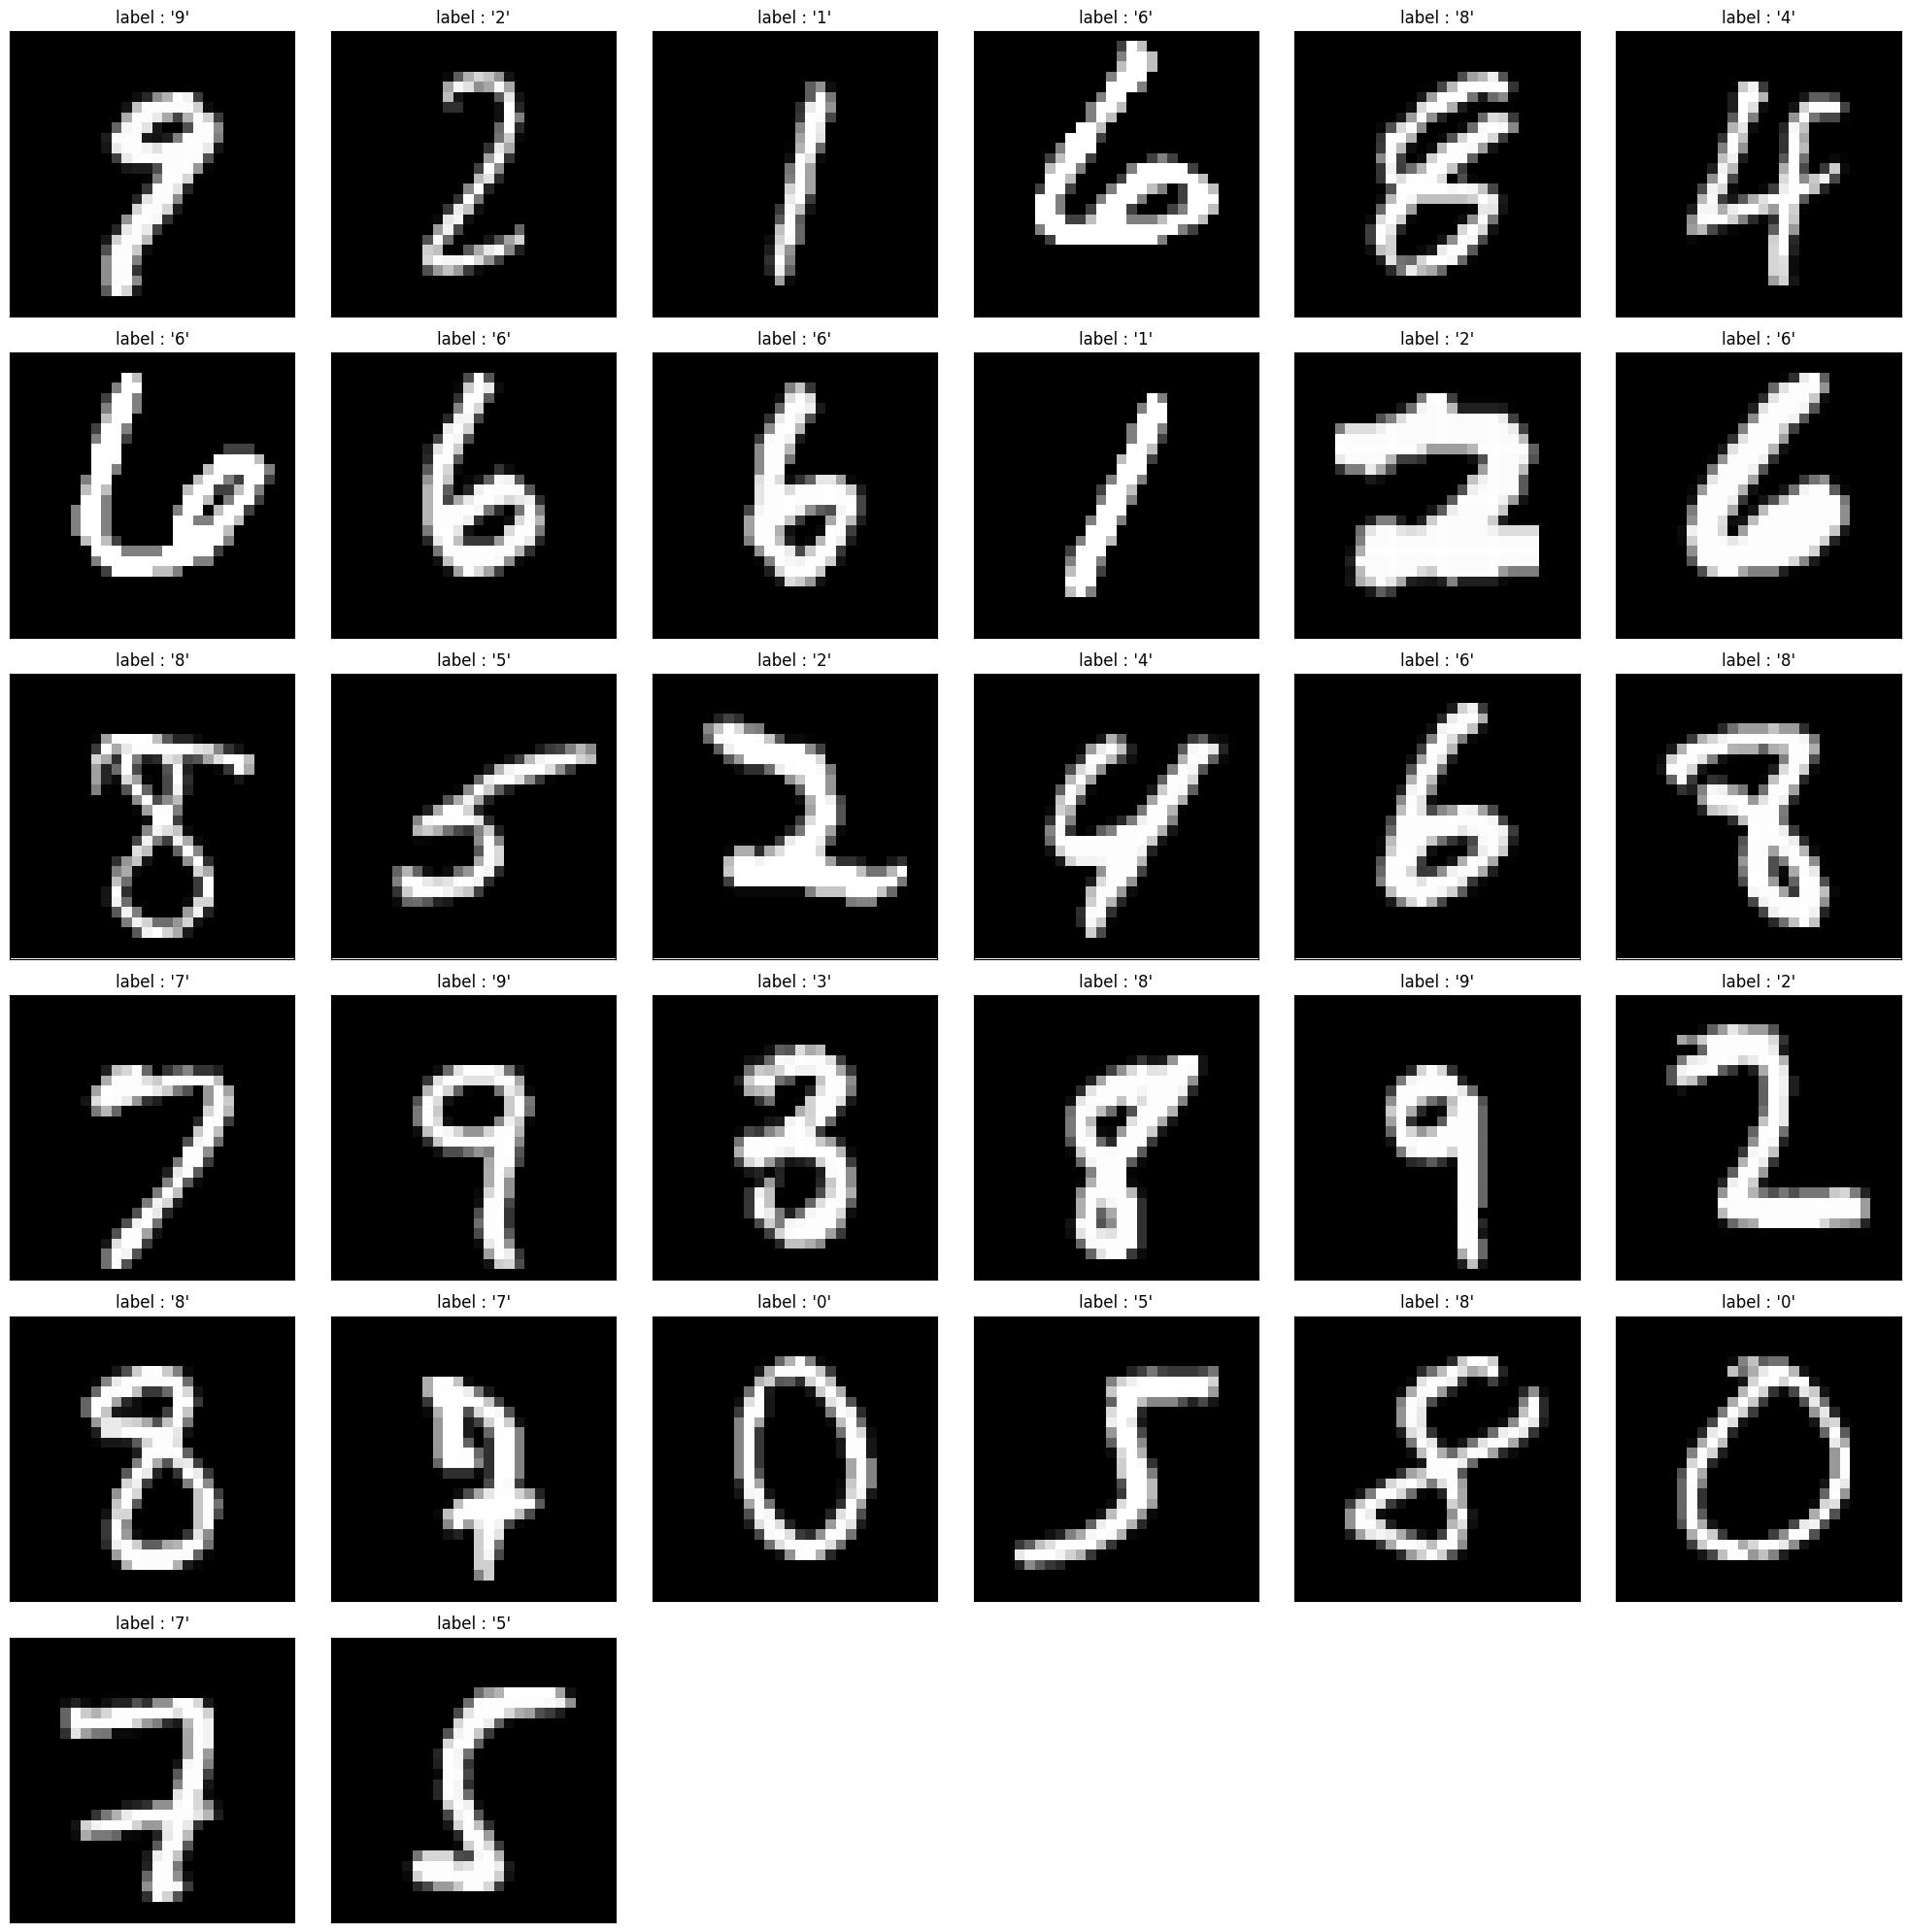

In [7]:
for data in valid_ds.take(1):
  plt.figure(figsize = (20,20))
  show_(data)

# model building

In [9]:
inputshape = data[0].shape[1:]

In [10]:
model = Sequential([
    Input(shape=inputshape),
    Conv2D(8, 5, strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, 5, strides=(1, 1), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(rate=0.2, seed=123),
    Dense(49, activation='relu'),
    Dense(10, activation='softmax')  # Fixed the number of units to 10 for MNIST
])

model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics= ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0

# model training

In [12]:
history = model.fit(train_ds, validation_data=valid_ds, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 27s 8ms/step - loss: 0.1966 - accuracy: 0.9393 - val_loss: 0.0661 - val_accuracy: 0.9782
Epoch 2/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0697 - accuracy: 0.9768 - val_loss: 0.0568 - val_accuracy: 0.9808
Epoch 3/12
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0537 - accuracy: 0.9826 - val_loss: 0.0423 - val_accuracy: 0.9853
Epoch 4/12
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.0361 - val_accuracy: 0.9884
Epoch 5/12
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0368 - accuracy: 0.9879 - val_loss: 0.0308 - val_accuracy: 0.9899
Epoch 6/12
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0311 - val_accuracy: 0.9904
Epoch 7/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0283 - accuracy: 0.9906 - val_loss: 0.0260 - val_ac

# model performence

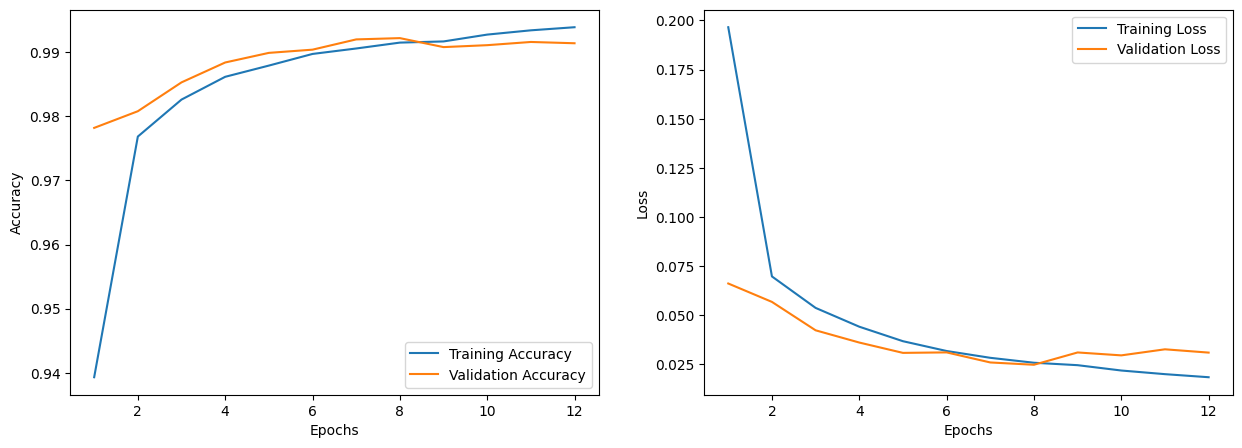

In [28]:
# Access accuracy values
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()



# inferencing

In [45]:

for data in valid_ds.take(1):
  images, labels = data
  labels = np.argmax(labels, 1)

preds = model.predict(images)
pred_labels = preds.argmax(1)

1/1 [==============================] - 0s 20ms/step


In [47]:
print(pred_labels)
print(labels)

[0 6 7 2 8 8 3 2 8 7 3 7 1 6 7 6 0 1 5 6 4 1 0 5 2 6 4 8 9 9 0 4]
[0 6 7 2 8 8 3 2 8 7 3 7 1 6 7 6 0 1 5 6 4 1 0 5 2 6 4 8 9 9 0 4]


# classification report

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_true=labels, y_pred= pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



# Visualization of predicted labels

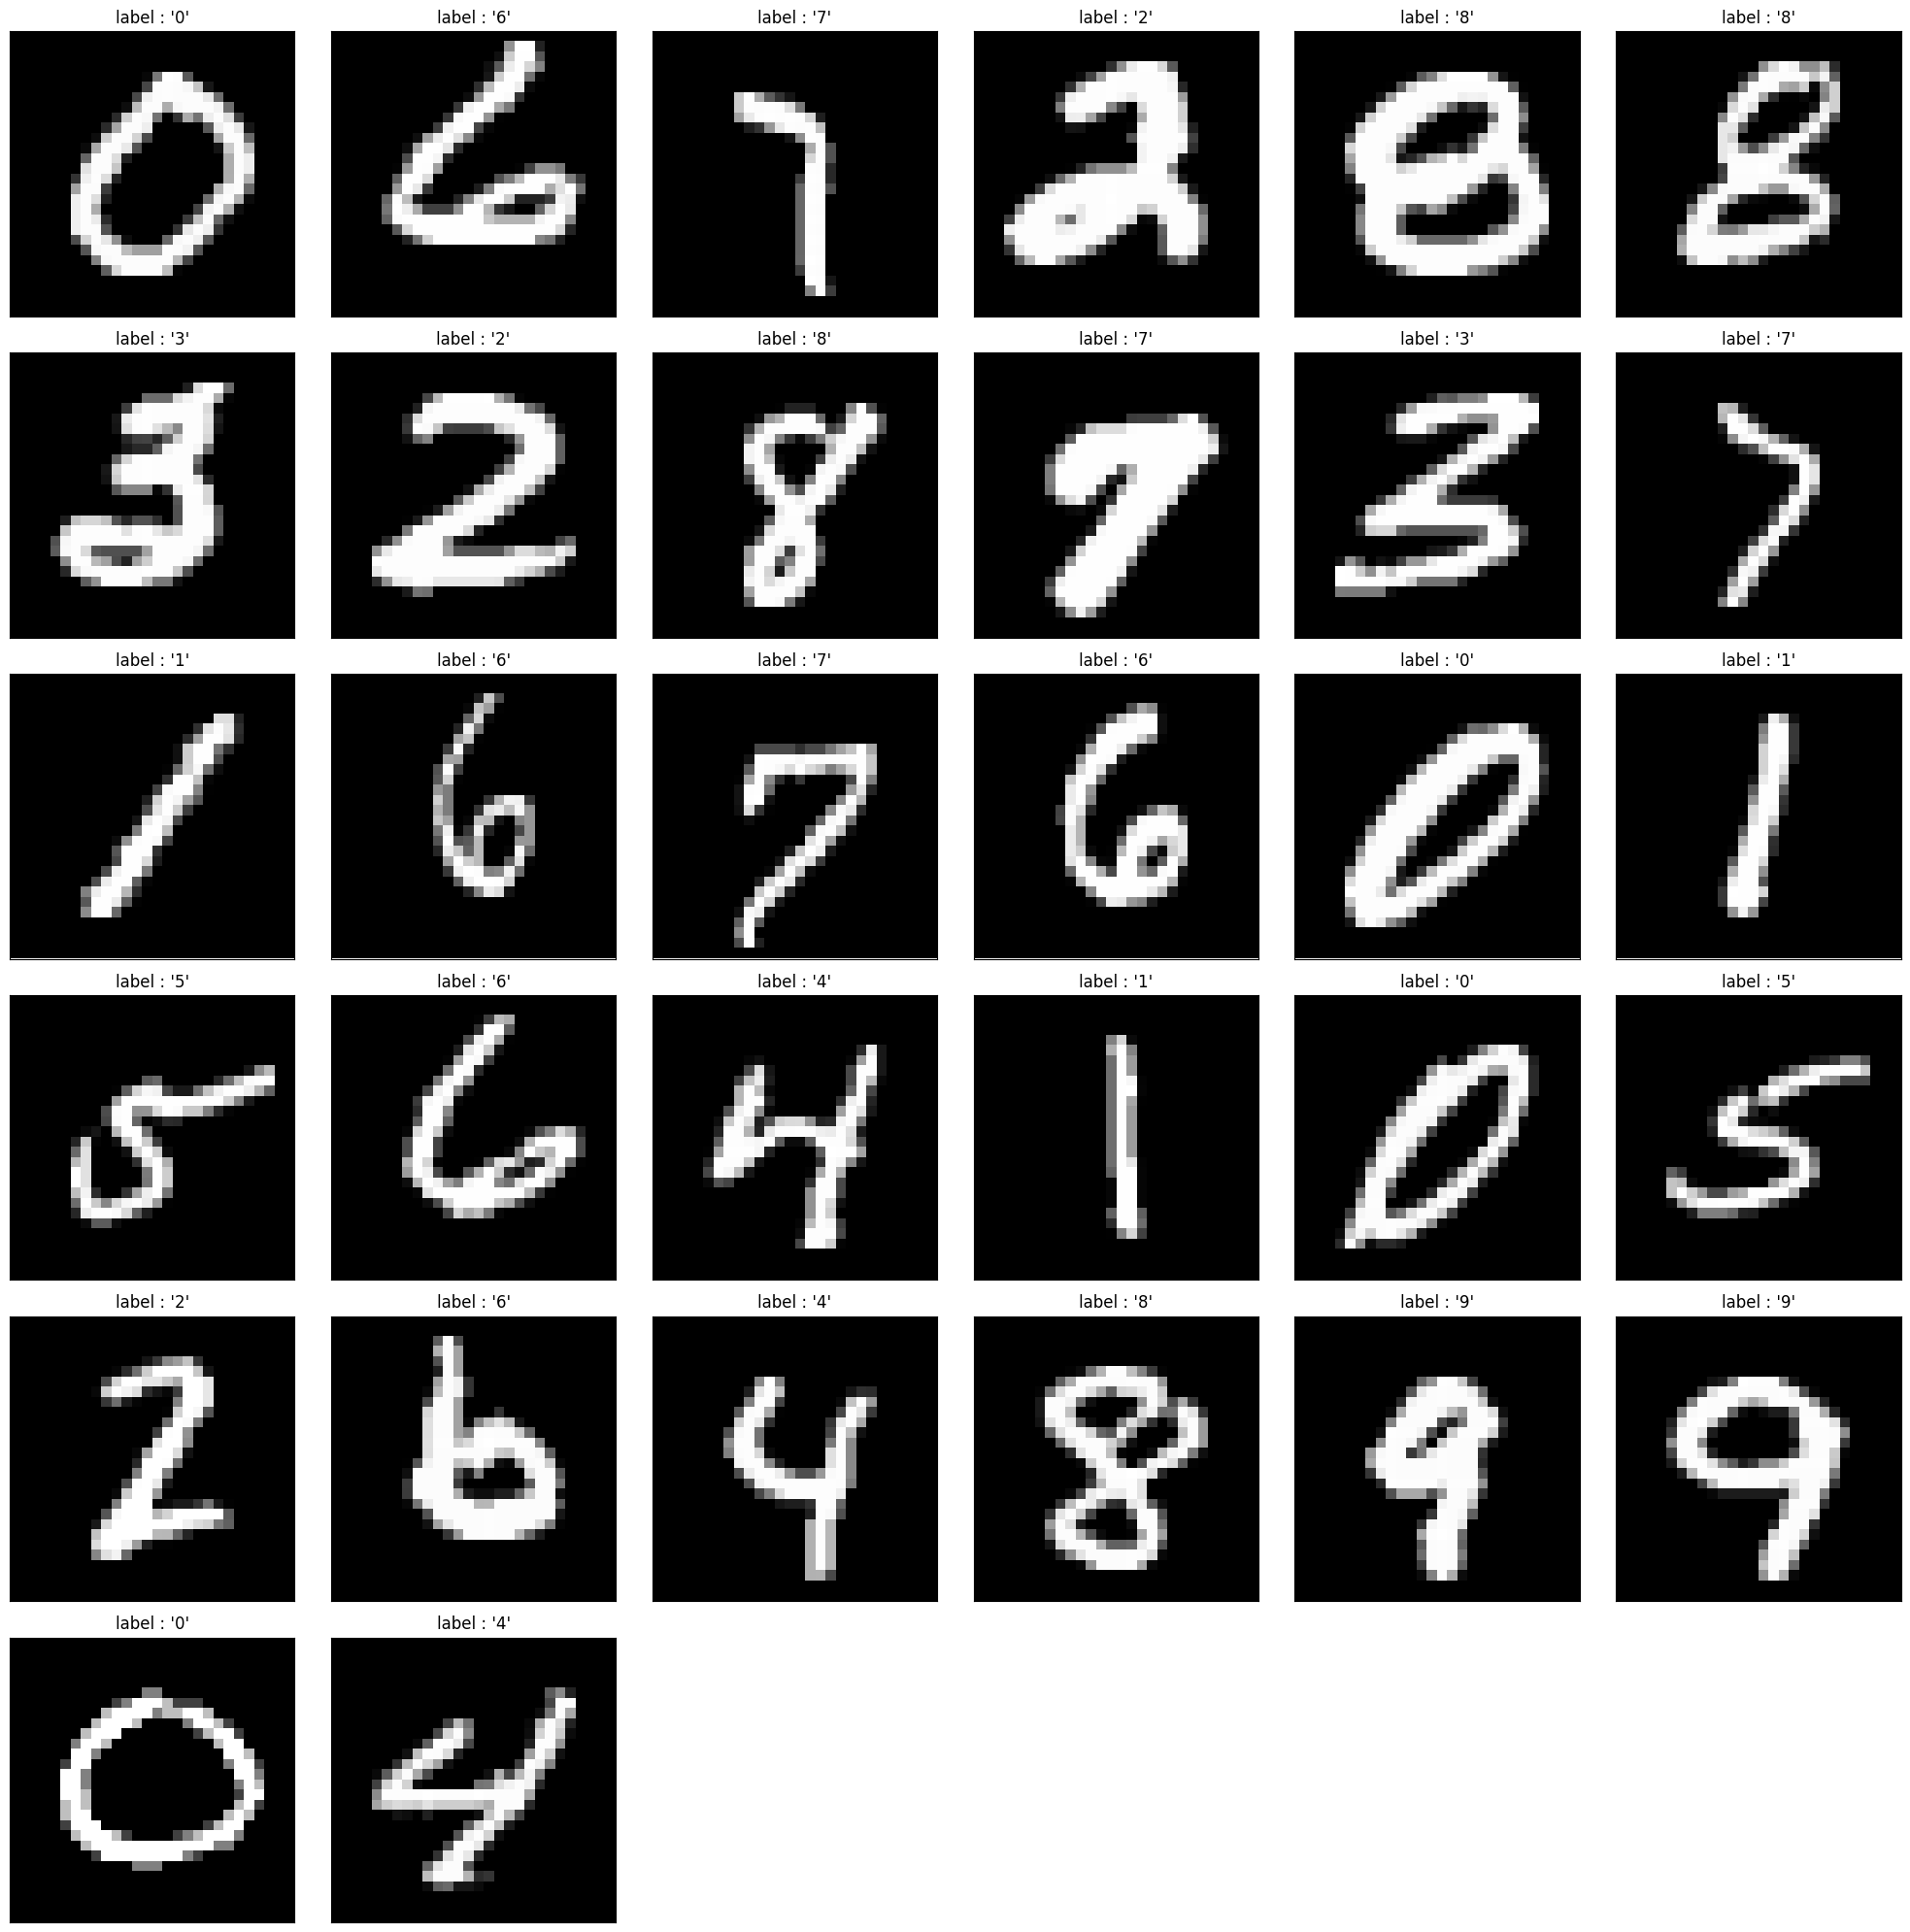

In [49]:
plt.figure(figsize = (20,20))
show_((images, preds))